# lec4

## import data

Import data from s3. Data from [zillow](https://www.zillow.com)

In [1]:
import pandas as pd

df = pd.read_csv("s3://ia340-2024-fall-01-456879/house_price_raw.csv")

df.head()

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/fsspec/registry.py:279: UserWarning: Your installed version of s3fs is very old and known to cause
severe performance issues, see also https://github.com/dask/dask/issues/10276

To fix, you should specify a lower version bound on s3fs, or
update the current installation.

  warnings.warn(s3_msg)


,ID,price,bedroom,bathroom,house_type,lot_size,built_in,area,days,views,hoa
0,991,169900,4.0,4.0,condo,0,2008.0,1396.0,4,3,243
1,992,79900,2.0,2.0,condo,0,1986.0,1012.0,77,561,250
2,993,229900,3.0,2.0,single-family home,10018,2002.0,1541.0,77,1357,0
3,994,149900,4.0,2.0,single-family home,8712,1975.0,1810.0,5,1282,0
4,995,229900,3.0,2.0,single-family home,13504,1988.0,1456.0,76,947,0


In [2]:
df.shape

(120, 11)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          120 non-null    int64  
 1   price       120 non-null    int64  
 2   bedroom     67 non-null     float64
 3   bathroom    67 non-null     float64
 4   house_type  120 non-null    object 
 5   lot_size    120 non-null    int64  
 6   built_in    68 non-null     float64
 7   area        66 non-null     float64
 8   days        120 non-null    int64  
 9   views       120 non-null    int64  
 10  hoa         120 non-null    int64  
dtypes: float64(4), int64(6), object(1)
memory usage: 10.4+ KB


In [4]:
df.describe()

,ID,price,bedroom,bathroom,lot_size,built_in,area,days,views,hoa
count,120.000000,1.200000e+02,67.000000,67.000000,1.200000e+02,68.000000,66.000000,120.000000,120.000000,120.000000
mean,1050.500000,2.442109e+05,3.328358,2.925373,2.169910e+05,1993.367647,2163.045455,53.291667,208.991667,78.766667
std,34.785054,1.826818e+05,0.911011,1.135694,8.128289e+05,22.112267,1164.397440,32.601592,328.136744,82.371237
min,991.000000,0.000000e+00,2.000000,1.000000,0.000000e+00,1924.000000,864.000000,3.000000,0.000000,0.000000
25%,1020.750000,1.500000e+05,3.000000,2.000000,6.835500e+03,1982.750000,1396.000000,17.750000,5.000000,0.000000
50%,1050.500000,1.750000e+05,3.000000,3.000000,1.742400e+04,1998.000000,1826.000000,71.000000,60.000000,50.000000
75%,1080.250000,2.865905e+05,4.000000,3.250000,2.178000e+04,2008.500000,2475.500000,77.000000,275.500000,160.000000
max,1110.000000,1.100000e+06,6.000000,6.000000,4.774176e+06,2018.000000,5955.000000,126.000000,1357.000000,300.000000


In [5]:
df['ID']

0       991
1       992
2       993
3       994
4       995
       ... 
115    1106
116    1107
117    1108
118    1109
119    1110
Name: ID, Length: 120, dtype: int64

In [6]:
df.sort_values('price')

,ID,price,bedroom,bathroom,house_type,lot_size,built_in,area,days,views,hoa
58,1049,0,5.0,3.5,single-family home,23522,1987.0,NaN,83,155,0
30,1021,0,3.0,2.5,townhouse,1671,1994.0,1160.0,73,63,0
112,1103,0,3.0,3.0,single-family home,79279,1985.0,NaN,84,66,0
17,1008,69900,NaN,NaN,lot or land,8712,NaN,NaN,77,292,55
117,1108,74900,NaN,NaN,lot or land,204732,NaN,NaN,84,100,0
...,...,...,...,...,...,...,...,...,...,...,...
19,1010,699900,5.0,6.0,single-family home,18295,2007.0,5955.0,75,100,0
115,1106,741000,NaN,NaN,lot or land,2482920,NaN,NaN,20,0,0
116,1107,780000,NaN,NaN,lot or land,2613600,NaN,NaN,20,0,0
34,1025,1100000,3.0,2.0,single-family home,4356000,1970.0,2541.0,20,58,0


In [7]:
df[0:10]

,ID,price,bedroom,bathroom,house_type,lot_size,built_in,area,days,views,hoa
0,991,169900,4.0,4.0,condo,0,2008.0,1396.0,4,3,243
1,992,79900,2.0,2.0,condo,0,1986.0,1012.0,77,561,250
2,993,229900,3.0,2.0,single-family home,10018,2002.0,1541.0,77,1357,0
3,994,149900,4.0,2.0,single-family home,8712,1975.0,1810.0,5,1282,0
4,995,229900,3.0,2.0,single-family home,13504,1988.0,1456.0,76,947,0
5,996,359000,5.0,4.0,single-family home,10130,1997.0,2903.0,79,951,0
6,997,164900,2.0,3.0,condo,0,1995.0,1800.0,54,342,21
7,998,218000,NaN,NaN,multi-family,10454,1979.0,2000.0,20,1178,0
8,999,394000,3.0,2.0,single-family home,18295,2001.0,2616.0,73,709,0
9,1000,349900,3.0,2.0,single-family home,204732,1967.0,3850.0,42,366,0


In [8]:
df['house_type'].value_counts()

house_type
lot or land           52
single-family home    38
townhouse             15
condo                 14
multi-family           1
Name: count, dtype: int64

In [9]:
df[ df['house_type']=='townhouse' ]

,ID,price,bedroom,bathroom,house_type,lot_size,built_in,area,days,views,hoa
12,1003,134900,2.0,2.0,townhouse,2300,1994.0,920.0,56,328,21
14,1005,149900,4.0,3.0,townhouse,2291,1999.0,1440.0,4,137,55
30,1021,0,3.0,2.5,townhouse,1671,1994.0,1160.0,73,63,0
38,1029,172500,3.0,3.0,townhouse,0,2007.0,1384.0,3,67,300
43,1034,288388,3.0,3.0,townhouse,0,2018.0,2400.0,12,61,190
44,1035,299900,3.0,3.0,townhouse,0,2018.0,2490.0,12,19,190
45,1036,286558,3.0,3.0,townhouse,0,2018.0,2400.0,12,19,190
46,1037,284783,3.0,3.0,townhouse,0,2018.0,2400.0,12,41,190
48,1039,240260,3.0,3.0,townhouse,0,2018.0,1666.0,11,48,190
49,1040,260757,3.0,3.0,townhouse,0,2018.0,1826.0,11,24,190


In [10]:
df['year']=pd.to_datetime(df['built_in'], format = "%Y"  )

df.head()

,ID,price,bedroom,bathroom,house_type,lot_size,built_in,area,days,views,hoa,year
0,991,169900,4.0,4.0,condo,0,2008.0,1396.0,4,3,243,2008-01-01
1,992,79900,2.0,2.0,condo,0,1986.0,1012.0,77,561,250,1986-01-01
2,993,229900,3.0,2.0,single-family home,10018,2002.0,1541.0,77,1357,0,2002-01-01
3,994,149900,4.0,2.0,single-family home,8712,1975.0,1810.0,5,1282,0,1975-01-01
4,995,229900,3.0,2.0,single-family home,13504,1988.0,1456.0,76,947,0,1988-01-01


In [11]:
df['unit_price'] = df['price']/df['area']

df.head()

,ID,price,bedroom,bathroom,house_type,lot_size,built_in,area,days,views,hoa,year,unit_price
0,991,169900,4.0,4.0,condo,0,2008.0,1396.0,4,3,243,2008-01-01,121.704871
1,992,79900,2.0,2.0,condo,0,1986.0,1012.0,77,561,250,1986-01-01,78.952569
2,993,229900,3.0,2.0,single-family home,10018,2002.0,1541.0,77,1357,0,2002-01-01,149.188838
3,994,149900,4.0,2.0,single-family home,8712,1975.0,1810.0,5,1282,0,1975-01-01,82.817680
4,995,229900,3.0,2.0,single-family home,13504,1988.0,1456.0,76,947,0,1988-01-01,157.898352


In [12]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 65 entries, 0 to 113
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ID          65 non-null     int64         
 1   price       65 non-null     int64         
 2   bedroom     65 non-null     float64       
 3   bathroom    65 non-null     float64       
 4   house_type  65 non-null     object        
 5   lot_size    65 non-null     int64         
 6   built_in    65 non-null     float64       
 7   area        65 non-null     float64       
 8   days        65 non-null     int64         
 9   views       65 non-null     int64         
 10  hoa         65 non-null     int64         
 11  year        65 non-null     datetime64[ns]
 12  unit_price  65 non-null     float64       
dtypes: datetime64[ns](1), float64(5), int64(6), object(1)
memory usage: 7.1+ KB


In [13]:
df['price'].mean()

294944.76923076925

In [15]:
avg_price_per_type =    df.groupby('house_type')['unit_price'].mean()

<Axes: xlabel='house_type'>

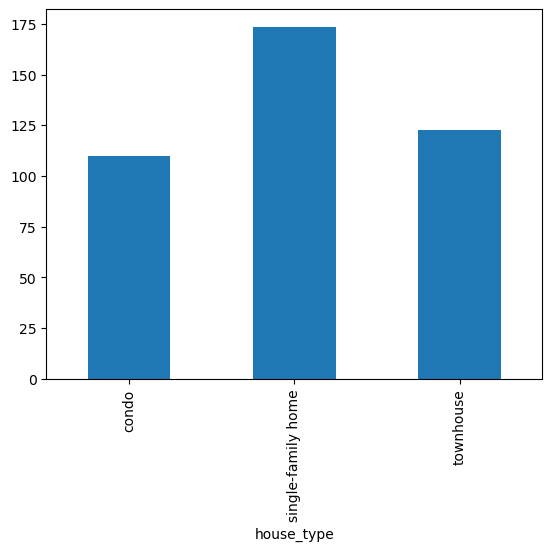

In [18]:
avg_price_per_type.plot.bar()

In [19]:
avg_unit_price = df.groupby('year')['unit_price'].mean()

<Axes: xlabel='year'>

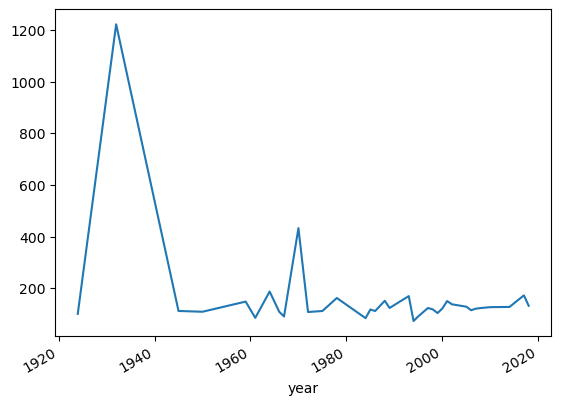

In [21]:
avg_unit_price.plot()

<Axes: xlabel='bedroom', ylabel='bathroom'>

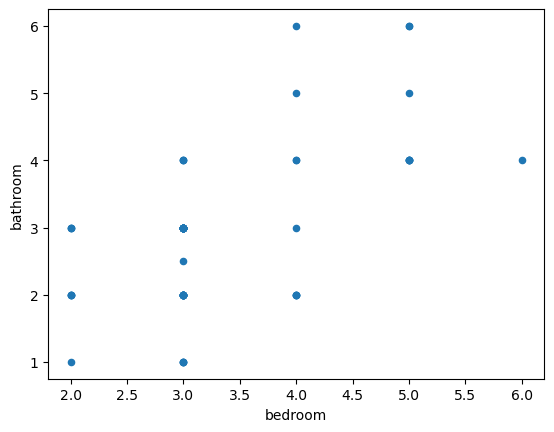

In [22]:
df.plot.scatter(x='bedroom',y='bathroom')